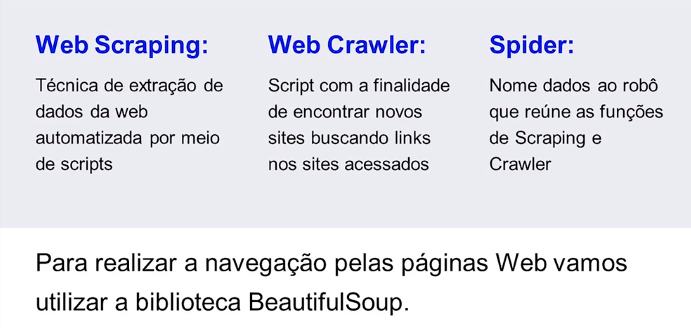

# Web Screaping:
- Técnica de extraçã de dados da web automatizada por meio de scripts

# Web Crawler:
- Script com a finalidade de encontrar novos sites biscando links nos sistes acessados

# Spider:
- Nome dados ao robô que reune as funções de Screaping e Crawler

##### Biblioteca "BeautifulSoup" sera utilizada para navegar pelas paginas web

##### *BeautifulSoup
    -Essa biblioteca nos permite mapear tegues, e realizar navegação entre elas.

In [1]:
from requests import get

#### Primeiramente, vamos fazer a raspagem do código de um site para termos conteudo para trabalharmos

In [2]:
resposta = get("https://www.python.org/jobs/")

##### Para conseguir navegar pelo codgo HTML utilizaremos a biblioteca BealtifulSoup

In [3]:
#!pip install bs4

##### Vamos utilizar também o parset HTML5LIB
- parset = uma especie de um decodificador para o conteudo

In [4]:
#!pip install html5lib

##### Agora vamos utilizar o BeatifulSoup para mapear o conteudo do codigo HTML

In [5]:
from bs4 import BeautifulSoup

In [6]:
# funciona apenas com o codigo html, o problema é que se não indicar um parset...
#...(decodificador para o conteudo), ela usara o proprio parset build-in default(padrão),...
#...que ja esta desatualizado.
# variavel = função_BeauticulSoup(codigo_HTML, "")
tags = BeautifulSoup(resposta.text, "html5lib")

In [7]:
help(tags)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

##### Para começar, vamos localizar a tag Title

In [8]:
# vamos pedir uma tegs especifica
# .find = localiza algo
# variavel = variavel.func_find("digite_o_caracter/numero/string_a_ser_encontrado")
title = tags.find("title")
title
# esse retorno não é da surface do web page
# "f12" para acessa "inspecionador"/"inspetor", procurar no "body"

<title>Python Job Board | Python.org</title>

In [9]:
# retorna o sem as tags html "</>"
title.text

'Python Job Board | Python.org'

##### Agora vamos tentar extrais os títulos de cada vaga

In [10]:
# Para achar um elemento da tela no codgo html, use a feramenta "inspecionar" e clique no que deseja localizar (ex:um titulo, clique em inspecionar e dps no titulo), f12
# É importante observar bem o codigo e oque se deseja buscar, para selecionar os melhores parametros de busca
subtitles = tags.find_all("h2")
v = [h2.text for h2 in subtitles]
print(v)
# Podemos observar no site que "Get exploring!" não é um dos titulos que desejamos pegar, portanto precisamos refinar nossos parametros de busca
# Alem de a devolução estar muito poluida visualmente

['Get exploring!', '\n                \n                    New\n                    \n                    Sr Python Developer\n\t\t    Fulfil.IO\n                \n                Remote, Remote\n            ', '\n                \n                    New\n                    \n                    Back-end Python Developer\n\t\t    EDF UK\n                \n                Flexible  - mainly remote, UK\n            ', '\n                \n                    New\n                    \n                    API Engineer - Python\n\t\t    OpenSlate\n                \n                New York, NY, US\n            ', '\n                \n                    New\n                    \n                    Python Developer - 100% REMOTE\n\t\t    Remotesome\n                \n                UTC +1 (London) - UTC +4 (Dubai), Europe\n            ', '\n                \n                    New\n                    \n                    Senior Python Developer\n\t\t    Globus.ai\n                \

In [11]:
# Quando um codigo de front segue as boas praticas, usasse CLASS para organizar a enorme quantidade de elementos existente
# Tendo isso em mente vamos buscar dentro das tag "h2" quais aquelas que pertencem a CLASS de titulos de vaga 
# solução: filtrar pela h2 com class referente a vagas 
# inspecionando o codgo consegue facilmente achar o ono da class
subtitles = tags.find_all("h2", attrs = {"class": "listing-company"})
v1 = [h2.text for h2 in subtitles]
v1

['\n                \n                    New\n                    \n                    Sr Python Developer\n\t\t    Fulfil.IO\n                \n                Remote, Remote\n            ',
 '\n                \n                    New\n                    \n                    Back-end Python Developer\n\t\t    EDF UK\n                \n                Flexible  - mainly remote, UK\n            ',
 '\n                \n                    New\n                    \n                    API Engineer - Python\n\t\t    OpenSlate\n                \n                New York, NY, US\n            ',
 '\n                \n                    New\n                    \n                    Python Developer - 100% REMOTE\n\t\t    Remotesome\n                \n                UTC +1 (London) - UTC +4 (Dubai), Europe\n            ',
 '\n                \n                    New\n                    \n                    Senior Python Developer\n\t\t    Globus.ai\n                \n             

## Outra forma de estrair os nomes de forma ainda mais clara

In [12]:
subtitles = tags.find_all("h2", attrs = {"class": "listing-company"})
v2 = [h2.a.text for h2 in subtitles]
# navegando dentro do obje "h2.text" acresenei o parametro "a" (referente aa links em html)
v2

['Sr Python Developer',
 'Back-end Python Developer',
 'API Engineer - Python',
 'Python Developer - 100% REMOTE',
 'Senior Python Developer',
 'Senior Software Engineer',
 'Senior Full Stack Developer (React, Python)',
 'Senior Software Engineer',
 'Software Engineer',
 'Python Developer',
 'Remote Python Engineers for Active Lifestyle Startup with $150M in Funding',
 'Senior Python/Django/Scrapy developer',
 'Senior Python Software Engineer',
 'Senior Python/Django Software Engineer',
 'Senior Fullstack Engineer - 100% REMOTE',
 'Senior Backend Developer',
 'Senior Backend Python Developer',
 'Jr Software Engineer',
 'Software Engineer, Full-Stack',
 'Software Engineer Tech Lead, Machine Learning',
 'Senior Software Engineer, Back-End',
 '# Python Django',
 'Python Developer - focus on load operations automations',
 'Senior Python Developer',
 'Full-stack web developer (js/python) (m/f/d)']

# Podemos construir um web Crawler extraindo os inks de cada vaga

In [13]:
# h2.a são atributos html que selecionamos para filtrar.  h2.a["href"] -> apos os filtros indico a chave que quero acessar -> href é a chave que guarda o linqui
links_das_vagas = ["https://www.python.org/jobs/" + h2.a["href"] for h2 in subtitles]
# O link vaga não possui a url do sit, pois ja esta dentro do site, por isso concateno a string referente a url do sit

In [14]:
links_das_vagas

['https://www.python.org/jobs//jobs/5567/',
 'https://www.python.org/jobs//jobs/5566/',
 'https://www.python.org/jobs//jobs/5565/',
 'https://www.python.org/jobs//jobs/5564/',
 'https://www.python.org/jobs//jobs/5563/',
 'https://www.python.org/jobs//jobs/5561/',
 'https://www.python.org/jobs//jobs/5559/',
 'https://www.python.org/jobs//jobs/5558/',
 'https://www.python.org/jobs//jobs/5557/',
 'https://www.python.org/jobs//jobs/5555/',
 'https://www.python.org/jobs//jobs/5554/',
 'https://www.python.org/jobs//jobs/5553/',
 'https://www.python.org/jobs//jobs/5552/',
 'https://www.python.org/jobs//jobs/5551/',
 'https://www.python.org/jobs//jobs/5550/',
 'https://www.python.org/jobs//jobs/5549/',
 'https://www.python.org/jobs//jobs/5548/',
 'https://www.python.org/jobs//jobs/5546/',
 'https://www.python.org/jobs//jobs/5545/',
 'https://www.python.org/jobs//jobs/5544/',
 'https://www.python.org/jobs//jobs/5543/',
 'https://www.python.org/jobs//jobs/5542/',
 'https://www.python.org/jobs//j

# Vamos fazer um "spider", juntando o webScreapin e o Crawler
#### a raspagem de informação e a coleta de links

In [15]:
# Dentro da minha lista de links vou rodar um for...
#..., usar a função get para cada link, eguardar temporariamente...
#... na variavel acesso, utilizando essa var farei um append(adicionarei, metodo de/para listas)...
sites = []

for pv in links_das_vagas:
    acesso = get(pv)
    sites.append(acesso)
    
# PODE SER FEITO ASSIM TBM :>
"""
for pv in links_das_vagas:
    sites.append(get(pv))
"""

'\nfor pv in links_das_vagas:\n    sites.append(get(pv))\n'

##### Uma dica impotate e que a separação por classes e a padronização do HTML depende dos desenvolvedores do site. Então, pode ser que em alguns sites seja dificil navegar, pois nã foram seguidas as boas praticas de desenvolvimento

# Usando o Scrapy

## Screapy é um framework muito potente utilizado para a criação de Web Sreaper, Web Crawlers e Spiders.

## Ele traz algumas ferramentas necessarias para extração de dados, e exploração do conteúdo HTML

In [16]:
# !pip install scrapy

In [17]:
from scrapy import Spider

class exemplo_screpy(Spider):
    name = "curso python pro"
    start_urls = ["http://quotes.toscrape.com/page/1",
                  "http://quotes.toscrape.com/page/2"]

    def parse(self, response):
        #quote = estação
        for quote in response.css("div.quote"): 
            yield{
                "text"  : quote.css("span.text::text").extracr(),
                "author": quote.css("small.author::text").extract(),
                "tags"  : quote.css("div.tags a.tag::text").extract(),
            }     
# O out put em linha de comando tende a ser ruim de ler, por isso faça...
#... -o nome_do_Arquivo.extenção recomendo cvs
# tentar rodar em uma outra idee